# Basic Sound Analysis in Python
#### with Pylab and Scipy
*Dirisu Jesse*

* __Importing the required packages__

In [1]:
import pylab as py

import scipy
from scipy.io.wavfile import read
from scipy.signal import hann
from scipy.fftpack import rfft, fft

* __Graphing the waveform of a WAV file with Scipy.io and Pylab (Matplotlib)__

In [2]:
source = read('sound.wav') #the file is converted into a numpy array of some sort, bear in mind that scipy is built upon numpy
sr, audio = source #sr here corresponds to the sample frequency of the file and audio to an array of acoustic values

print('Sample Frequency: {:}Hz \nAcoustic Values: {:}'.format(sr, audio))

Sample Frequency: 44100Hz 
Acoustic Values: [ -121  -164  -282 ..., -1064  -815  -717]


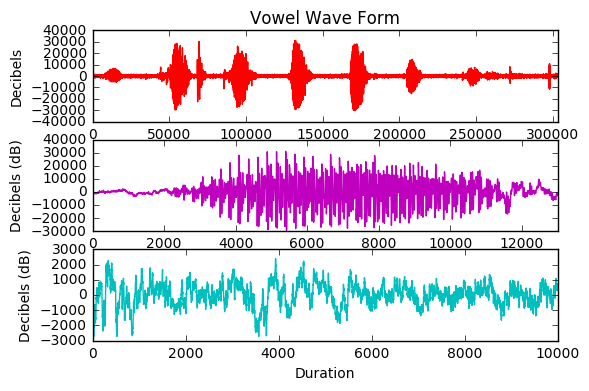

In [26]:
py.subplot(3,1,1)
py.plot(audio, 'r')
py.ylabel('Decibels')
py.xlabel('Duration')
py.title('Vowel Wave Form')
py.xlim(0, 303104)

py.subplot(3,1,2)
# Analysis may also be carried out on specific slices of the sound token as shown below
py.plot(audio[127000:140000], 'm')
py.ylabel('Decibels (dB)')
py.xlabel('Duration')
#py.title('A Vowelic Slice')
py.xlim(0, 13000)

py.subplot(3,1,3)
py.plot(audio[180000:190000], 'c')
py.ylabel('Decibels (dB)')
py.xlabel('Duration')
#py.title('A Noisy Slice')

py.show()

* __Basic Fourier Analysis__

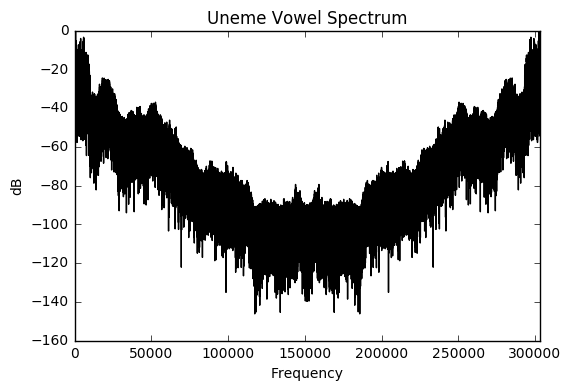

In [4]:
window = hann(303104)
sample = audio * window

magnitude = 20 * scipy.log10(abs(fft(sample)))
magnitude -= max(magnitude)

py.plot(magnitude, 'k')
py.ylabel('dB')
py.xlabel('Frequency')
py.title('Uneme Vowel Spectrum')
py.xlim(0, 303104)

py.show()

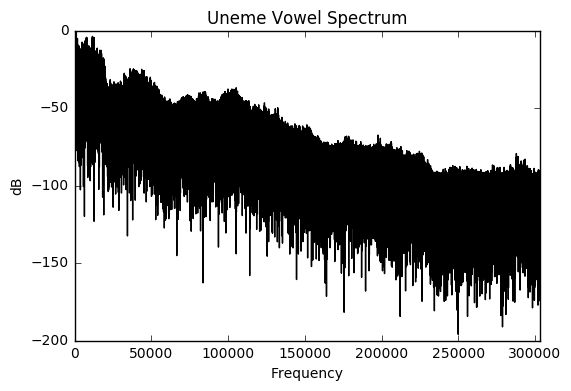

In [5]:
window = hann(303104)
sample = audio * window

magnitude = 20 * scipy.log10(abs(rfft(sample)))
magnitude -= max(magnitude)

py.plot(magnitude, 'k')
py.ylabel('dB')
py.xlabel('Frequency')
py.title('Uneme Vowel Spectrum')
py.xlim(0, 303104)

py.show()

In [27]:
help(scipy.fftpack)

Help on package scipy.fftpack in scipy:

NAME
    scipy.fftpack

DESCRIPTION
    Discrete Fourier transforms (:mod:`scipy.fftpack`)
    
    Fast Fourier Transforms (FFTs)
    
    .. autosummary::
       :toctree: generated/
    
       fft - Fast (discrete) Fourier Transform (FFT)
       ifft - Inverse FFT
       fft2 - Two dimensional FFT
       ifft2 - Two dimensional inverse FFT
       fftn - n-dimensional FFT
       ifftn - n-dimensional inverse FFT
       rfft - FFT of strictly real-valued sequence
       irfft - Inverse of rfft
       dct - Discrete cosine transform
       idct - Inverse discrete cosine transform
       dst - Discrete sine transform
       idst - Inverse discrete sine transform
    
    Differential and pseudo-differential operators
    
    .. autosummary::
       :toctree: generated/
    
       diff - Differentiation and integration of periodic sequences
       tilbert - Tilbert transform:         cs_diff(x,h,h)
       itilbert - Inverse Tilbert transform: s